In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
train_data = pd.read_csv('./data/final_data.csv')
train_data2 = pd.read_csv('./data/final_data.csv')
train_data['MONTH'] = train_data['MONTH'].astype('object')
train_data['HOUR'] = train_data['HOUR'].astype('object')
train_data['WEEKDAY'] = train_data['WEEKDAY'].astype('object')
train_data['SEASON'] = train_data['SEASON'].astype('object')
train_data2['MONTH'] = train_data2['MONTH'].astype('object')
train_data2['HOUR'] = train_data2['HOUR'].astype('object')
train_data2['WEEKDAY'] = train_data2['WEEKDAY'].astype('object')
train_data2['SEASON'] = train_data2['SEASON'].astype('object')

del train_data['RETURN_COUNT']
del train_data2['RENT_COUNT']
del train_data['DAY']
del train_data2['DAY']
train_data2_col= train_data2.columns.tolist()
train_data2_col = train_data2_col+[train_data2_col.pop(4)]
train_data2=train_data2[train_data2_col]


In [12]:
train_data.head(5)

,STATION,YEAR,MONTH,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,LOCALPRESSURE,SNOWFALL,RENT_COUNT
0,1.0,2013.0,1,0,1,3,8.8,0.0,0.1,90.0,1013.3,8.8,0.0
1,1.0,2013.0,1,1,1,3,8.5,0.0,0.9,90.0,1013.2,8.8,0.0
2,1.0,2013.0,1,2,1,3,8.5,0.0,1.0,89.0,1012.6,8.8,0.0
3,1.0,2013.0,1,3,1,3,9.0,0.0,0.7,91.0,1012.5,8.8,0.0
4,1.0,2013.0,1,4,1,3,9.1,0.0,0.6,92.0,1011.4,8.8,0.0


In [13]:
train_data2.head(5)

,STATION,YEAR,MONTH,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,LOCALPRESSURE,SNOWFALL,RETURN_COUNT
0,1.0,2013.0,1,0,1,3,8.8,0.0,0.1,90.0,1013.3,8.8,0.0
1,1.0,2013.0,1,1,1,3,8.5,0.0,0.9,90.0,1013.2,8.8,0.0
2,1.0,2013.0,1,2,1,3,8.5,0.0,1.0,89.0,1012.6,8.8,0.0
3,1.0,2013.0,1,3,1,3,9.0,0.0,0.7,91.0,1012.5,8.8,0.0
4,1.0,2013.0,1,4,1,3,9.1,0.0,0.6,92.0,1011.4,8.8,0.0


In [27]:
np_read_data = np.array(train_data)
np_read_data2 = np.array(train_data2)
data_x = np_read_data[:,2:12]
data_y = np_read_data[:,-1]
data_x2 = np_read_data2[:,2:12]
data_y2 = np_read_data2[:,-1]

col_n = np.array(train_data.columns.values)
col_n = np.delete(col_n,0)
col_n = np.delete(col_n,1)
col_n = np.delete(col_n,-1)

col_n2 = np.array(train_data2.columns.values)
col_n2 = np.delete(col_n2,0)
col_n2 = np.delete(col_n2,1)
col_n2 = np.delete(col_n2,-1)

trn_x, tst_x, trn_y, tst_y = train_test_split(data_x2, data_y2, test_size=0.3,)

trn_x2, tst_x2, trn_y2, tst_y2 = train_test_split(data_x2, data_y2, test_size=0.3,)


In [28]:
rand_ft = RandomForestRegressor(n_estimators=50)
rand_ft.fit(X=trn_x,y=trn_y)
rand_ft2 = RandomForestRegressor(n_estimators=50)
rand_ft2.fit(X=trn_x2,y=trn_y2)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

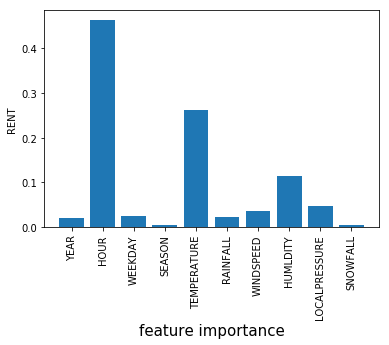

In [34]:
index= np.arange(10)
pred_rand = rand_ft.predict(X=tst_x)
plt.bar(index,rand_ft.feature_importances_)
plt.xticks(index, col_n,rotation=90)
plt.ylabel('RENT')
plt.xlabel('feature importance', size=15)
plt.show()

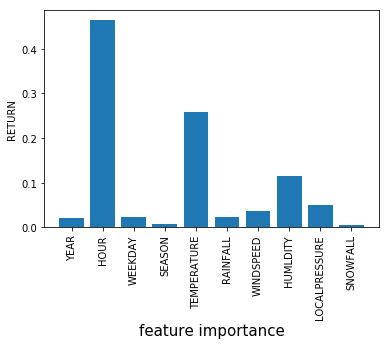

In [38]:
index2= np.arange(10)
pred_rand2 = rand_ft2.predict(X=tst_x)
plt.bar(index2,rand_ft2.feature_importances_)
plt.xticks(index2, col_n2,rotation=90)
plt.ylabel('RETURN')
plt.xlabel('feature importance', size=15)
plt.show()

In [2]:
train_2015=pd.read_csv('./data/final_data.csv')
train_2015=train_2015[train_2015['YEAR']==2015]
train_2015=train_2015[train_2015['MONTH']==1][train_2015['STATION']==3]
train_2015_data = train_2015[train_2015['DAY']==1]
del train_2015_data['RETURN_COUNT']
train_2015_data

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,LOCALPRESSURE,SNOWFALL,RENT_COUNT
70081,3.0,2015.0,1.0,1.0,0.0,2,3.0,4.1,0.3,4.2,82.0,1014.1,0.5,0.0
70082,3.0,2015.0,1.0,1.0,1.0,2,3.0,5.7,0.0,2.8,74.0,1014.2,0.5,0.0
70083,3.0,2015.0,1.0,1.0,2.0,2,3.0,6.4,0.0,2.6,60.0,1014.3,0.5,0.0
70084,3.0,2015.0,1.0,1.0,3.0,2,3.0,6.5,0.0,2.7,53.0,1014.9,0.5,0.0
70085,3.0,2015.0,1.0,1.0,4.0,2,3.0,6.6,0.0,2.5,61.0,1014.7,0.5,0.0
70086,3.0,2015.0,1.0,1.0,5.0,2,3.0,7.0,0.0,2.4,73.0,1014.7,0.5,0.0
70087,3.0,2015.0,1.0,1.0,6.0,2,3.0,7.2,0.0,1.4,79.0,1014.7,0.5,0.0
70088,3.0,2015.0,1.0,1.0,7.0,2,3.0,7.6,0.0,1.4,74.0,1015.1,0.5,0.0
70089,3.0,2015.0,1.0,1.0,8.0,2,3.0,8.3,0.0,1.1,74.0,1015.8,0.5,3.0
70090,3.0,2015.0,1.0,1.0,9.0,2,3.0,7.4,0.0,0.9,61.0,1016.4,0.5,0.0


In [4]:
a = train_2015_data.columns
a

Index(['STATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'WEEKDAY', 'SEASON',
       'TEMPERATURE', 'RAINFALL', 'WINDSPEED', 'HUMLDITY', 'LOCALPRESSURE',
       'SNOWFALL', 'RENT_COUNT'],
      dtype='object')

In [29]:
#np_read_data3 = np.array(train_2015_data)
data_x3 = train_2015_data.iloc[:,2:12]
data_y3 = train_2015_data.iloc[:,-1]
rand_ft3 = RandomForestRegressor(n_estimators=50)
rand_ft3.fit(X=data_x3,y=data_y3)

pred_2015 = rand_ft3.predict(X=data_x3)
pred_2015

array([1.02, 0.06, 0.  , 0.08, 0.  , 0.  , 0.12, 0.12, 2.1 , 0.36, 0.18,
       0.24, 0.6 , 1.42, 1.86, 4.2 , 0.82, 1.92, 0.  , 0.06, 0.06, 0.06,
       0.06, 0.06])

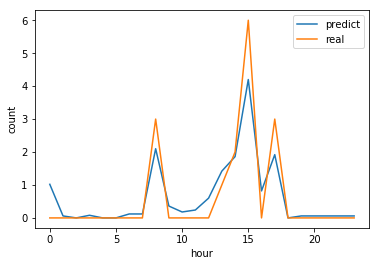

In [33]:
plt.plot(pred_2015.tolist(),label="predict")
plt.plot(data_y3.tolist(),label='real')
plt.xlabel('hour')
plt.ylabel('count')
plt.legend()
plt.show()

In [37]:
err=pred_2015-data_y3.values
error = np.sqrt(np.mean((err)**2))
print(round(error,2),'Degrees')

0.57 Degrees
